Project 2
---
**Author: Leonard Li**

In [104]:
#importing necessary packs and modules
import numpy as np
import matplotlib.pyplot as plt
import math

#Problem 1.1, 1.2
def Lagrange(x, y, xx):
    # Lagrange interpolation:
    # x,y: training set and labels
    # xx: input index
    #expect output ret: the result of interpolation
    ret = 0
    n=len(x)
    for i in range(0,n):
        l=1
        for k in range(0,n):
            if(k!=i):
                l*=((xx-x[k])/(x[i]-x[k]))
            else:
                pass
        ret+=l*y[i]
    return ret

def f(x):
    # calculating f(x) in Prob 1.2 as f(x) = 1/(1+x^2)
    # note that in python, you should write ** instead of ^
    return 1/(1+x**2)

def GenerateNodes(n): #n = 4, 10, 14, 20
    # xi=-5+ih, in which h=10/n, n=4,10,14,20
    # i = range(0,n+1), n+1 elements
    h=10/n
    x=np.zeros(n+1)
    for i in range(0,n+1):
        x[i]=-5+i*h
    return x

def plot_prob1_2():
    # plotting for Prob 1.2
    # plotting f and the interpolation result in the same figure
    xx = np.zeros(5001)
    yy = np.zeros(5001)
    for i in range(0,5001): #Generating Nodes for funtion f(x)
        xx[i]=-5+(10/5000)*i
        yy[i]=f(xx[i])
    N=[4,10,14,20]
    for i in range(0,4):
        x = GenerateNodes(N[i])
        y = np.zeros(N[i]+1)
        interpol_x = np.zeros(1002)
        interpol_y = np.zeros(1002)
        for j in range(0, N[i]):
            y[j]=f(x[j])
        for k in range(0, 1001): #try 1000 points, ranging from -5+0.01*0 to -5+0.01*1000 
            interpol_x[k] = -5+k*0.01
            interpol_y[k] = Lagrange(x, y, -5+k*0.01)
        plt.figure(i+1,figsize=(4,3))
        plt.plot(xx,yy)
        plt.scatter(interpol_x, interpol_y, s=0.1, color="red")


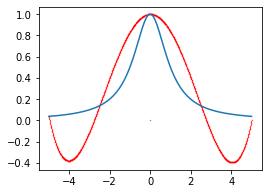

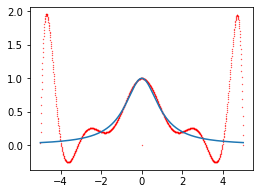

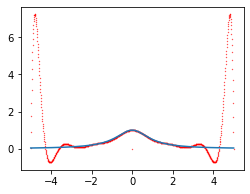

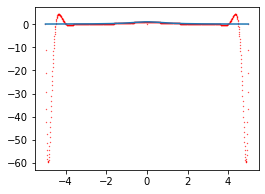

In [105]:
#Plotting for Prob 1.2
#The blue figure is f(x), while red dots are Lagrange interpolaton results
plot_prob1_2()

In [107]:
# Problem 1.3
def GenerateChebNodes(n): #n = 4, 10, 14, 20
    # i = range(0,n+1), n+1 elements
    z=np.zeros(n+1)
    x=np.zeros(n+1)
    pi=math.pi
    for i in range(0,n+1):
        z[i] = math.cos((pi/2)*(2*i+1)/(n+1))
    for i in range(0,n+1):
        x[i]=5*z[i] #a=-5, b=5
    return x

def plot_prob1_3():
    # plotting for Prob 1.3
    # plotting f and the interpolation result in the same figure
    xx = np.zeros(5001)
    yy = np.zeros(5001)
    for i in range(0,5001): #Generating Nodes for funtion f(x)
        xx[i]=-5+(10/5000)*i
        yy[i]=f(xx[i])
        
    
    N=[4,10,14,20]
    for i in range(0,4):
        x = GenerateChebNodes(N[i])
        y = np.zeros(N[i]+1)
        interpol_x = np.zeros(1002)
        interpol_y = np.zeros(1002)
        for j in range(0, N[i]):
            y[j]=f(x[j])
        for k in range(0, 1001): #try 1000 points, ranging from -5+0.01*0 to -5+0.01*1000 
            interpol_x[k] = -5+k*0.01
            interpol_y[k] = Lagrange(x, y, -5+k*0.01)
        plt.figure(i+1,figsize=(4,3))
        plt.plot(xx,yy)
        plt.scatter(interpol_x, interpol_y, s=0.1, color="red")

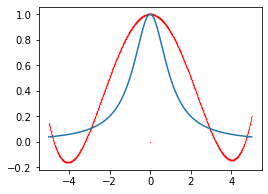

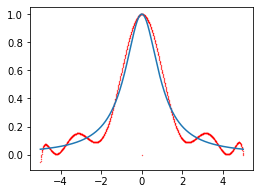

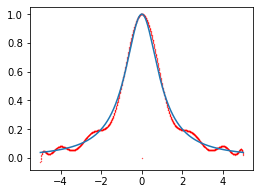

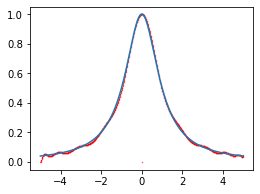

In [108]:
#Plotting for Prob 1.3
#The blue figure is f(x), while red dots are Lagrange interpolaton results
plot_prob1_3()

In [69]:
#Problem 1.4
#Newton method of interpolation
def PI(n, xx, x):
    #Reference: Page 16, 24
    if(n==0):
        return 1
    else:
        return PI(n-1, xx, x)*(xx-x[n-1])

def Newton(n, xx, x, y):
    # Reference: Page 23: N_n(x) = N_n-1(x) + q(x), 
    #q(x) = an*pi_n(x)
    #an = (yn-N_n-1(xn))/pi_n(xn)    (in fact, an=f[x0,x1,...,xn])
    #init values: N_0(x)=y[0]
    #print(n)
    if(n==0):
        return y[0]
    else:
        return Newton(n-1,xx, x, y) + PI(n,xx,x)*(y[n]-Newton(n-1,x[n],x,y))/PI(n,x[n],x)

def plot_temp(N):
        xx = np.zeros(5001)
        yy = np.zeros(5001)
        for i in range(0,5001): #Generating Nodes for funtion f(x)
            xx[i]=-5+(10/5000)*i
            yy[i]=f(xx[i])
        x = GenerateNodes(N)
        y = np.zeros(N+1)
        interpol_x = np.zeros(52)
        interpol_y = np.zeros(52)
        for j in range(0, N):
            y[j]=f(x[j])
        for k in range(0, 51): #try 50 points, ranging from -5+0.01*0 to -5+0.01*1000 
            interpol_x[k] = -5+k*0.2
            interpol_y[k] = Newton(N, interpol_x[k], x, y)
        plt.figure()
        plt.plot(xx,yy)
        plt.scatter(interpol_x, interpol_y, s=1, color="red")
    
def plot_prob1_4(nn):
    #n = 4, 10, 14, 20
    # plotting for Prob 1.4
    # plotting f and the interpolation (Newton) result in the same figure
    # it seems plotting 1000 points is too heavy calculation load for the kernel, I changed total nodes to 50
    # under my guess, when N goes up to 20, calculating one point using Newton(20,...) cost approximately 5 seconds, this is a major setback of recursion.
    plot_temp(nn)

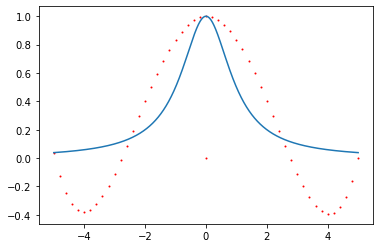

In [70]:
#When n=4
plot_prob1_4(4)

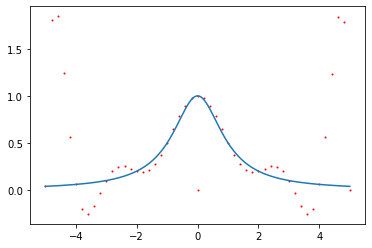

In [71]:
#When n=10
plot_prob1_4(10)

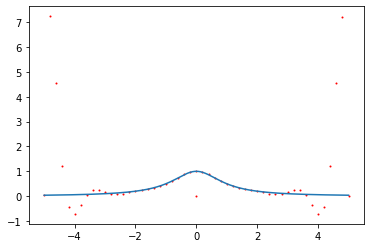

In [72]:
#When n=14
plot_prob1_4(14)

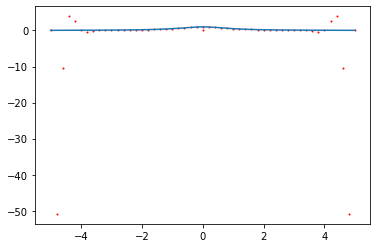

In [73]:
#When n=20
plot_prob1_4(20)

In [74]:
#Using Chebvchev nodes
def plot_temp2(N):
        xx = np.zeros(5001)
        yy = np.zeros(5001)
        for i in range(0,5001): #Generating Nodes for funtion f(x)
            xx[i]=-5+(10/5000)*i
            yy[i]=f(xx[i])
        x = GenerateChebNodes(N)
        y = np.zeros(N+1)
        interpol_x = np.zeros(52)
        interpol_y = np.zeros(52)
        for j in range(0, N):
            y[j]=f(x[j])
        for k in range(0, 51): #try 50 points, ranging from -5+0.01*0 to -5+0.01*1000 
            interpol_x[k] = -5+k*0.2
            interpol_y[k] = Newton(N, interpol_x[k], x, y)
        plt.figure()
        plt.plot(xx,yy)
        plt.scatter(interpol_x, interpol_y, s=1, color="red")

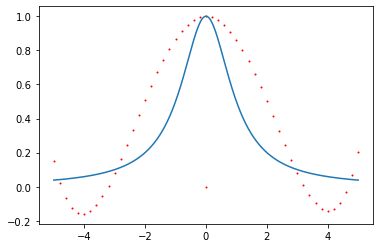

In [75]:
#Newton & Cheb, n=4
plot_temp2(4)

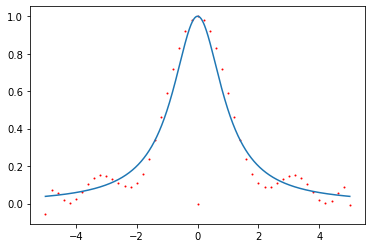

In [76]:
#Newton & Cheb, n=10
plot_temp2(10)

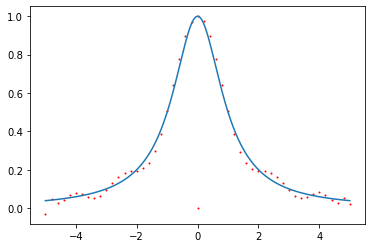

In [77]:
#Newton & Cheb n=14
plot_temp2(14)

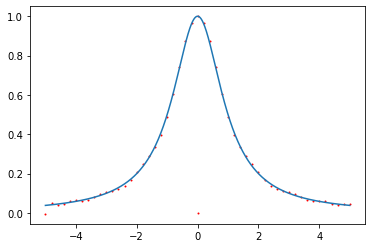

In [78]:
#Newton & Cheb n=20
plot_temp2(20)

In [111]:
#Problem 2.1
#Use the Subsectional Linear interpolation method to deal with Problem 1.2
    
def plot_prob2_1():
    xx=np.zeros(5001)
    yy=np.zeros(5001)
    for i in range(0,5001): #Generating Nodes for funtion f(x)
        xx[i]=-5+(10/5000)*i
        yy[i]=f(xx[i])
    N=[20,50,80,120] #dividing interval [-5,5] into N[i] subintervals
    for i in range(0,4): 
        plt.figure(i+1,figsize=(4,3))
        plt.plot(xx,yy)
        cuts=np.zeros(N[i])
        subintervallen=10/(N[i]-1) #Generating cut points
        for j in range(0,N[i]):
            cuts[j]=-5+j*subintervallen
        for j in range(0,N[i]-1): #Plot 100 nodes in each subinterval
            st = cuts[j]
            ed = cuts[j+1]
            interpol_x = np.zeros(101)
            interpol_y = np.zeros(101)
            for k in range(0,101):
                interpol_x[k] = st+k*subintervallen/100
                interpol_y[k] = f(st)+(f(ed)-f(st))*k/100
            plt.scatter(interpol_x, interpol_y, s=0.1, color="red")
        
        
        
        
       # plt.scatter(interpol_x, interpol_y, s=0.1, color="red")


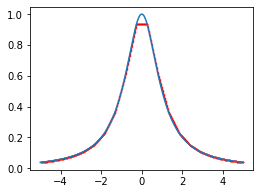

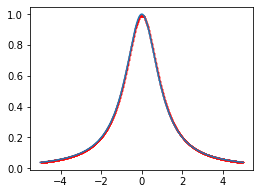

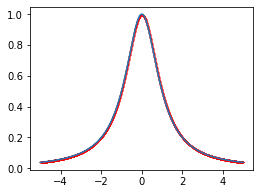

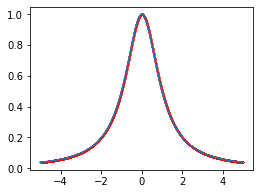

In [112]:
plot_prob2_1()

In [83]:
#Problem 2.2
#Use Hermite3 interpolation method
#Reference: Page 36  Note when s=2, we obtain Hermite3 interpolation method.
import random
def df(x):#calculating the derivative of f(x)
    return -2*x/math.pow(1+x**2,2)

def Hermite3(x,y,xx):
    #Hermite3 method takes only 2 samples, choosing a proper set of xi might be important?
    return (1-(2*(xx-x[0])/(x[0]-x[1])))*math.pow((xx-x[1])/(x[0]-x[1]),2)*y[0]+(xx-x[0])*math.pow((xx-x[1])/(x[0]-x[1]),2)*df(x[0])+(1-(2*(xx-x[1])/(x[1]-x[0])))*math.pow((xx-x[0])/(x[1]-x[0]),2)*y[1]+(xx-x[1])*math.pow((xx-x[0])/(x[1]-x[0]),2)*df(x[1])

def plot_temp():
        x=np.zeros(2)
        y=np.zeros(2)
        x[0]=-5+random.random()*10
        y[0]=f(x[0])
        x[1]=5-random.random()*10
        y[1]=f(x[1])
        print("points selected:",x[0]," ",y[0])
        print("                ",x[1]," ",y[1])
        xx=np.zeros(5001)
        yy=np.zeros(5001)
        for i in range(0,5001): #Generating Nodes for funtion f(x)
            xx[i]=-5+(10/5000)*i
            yy[i]=f(xx[i])
        interpol_x = np.zeros(1001)
        interpol_y = np.zeros(1001)
        for k in range(0,1001):
            interpol_x[k] = -5+0.01*k
            interpol_y[k] = Hermite3(x,y,interpol_x[k])
        plt.figure()
        plt.plot(xx,yy,color="blue")
        plt.scatter(interpol_x, interpol_y, s=0.1, color="red")
    

points selected: -4.594548896417491   0.045228649808571705
                 1.2512548210708232   0.38976650467361307


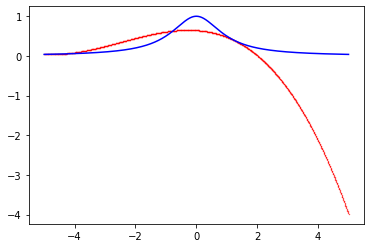

In [84]:
plot_temp()

points selected: 1.6151223408438762   0.2771142296106396
                 2.863034540216829   0.10873150073135962


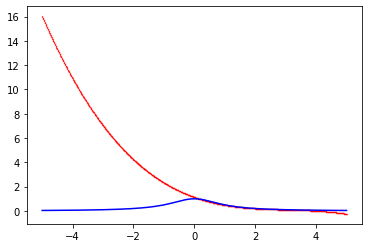

In [85]:
plot_temp()

points selected: 4.306878494882941   0.051152982156995576
                 -4.272860223771543   0.05192826662595439


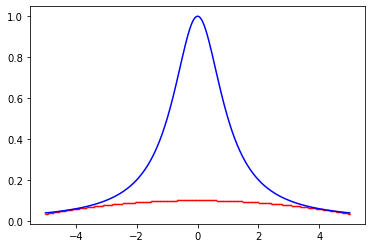

In [86]:
plot_temp()

points selected: -2.433826039653585   0.1444354260780338
                 1.5738093806756357   0.2876145164730659


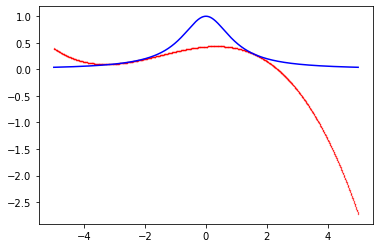

In [87]:
plot_temp()

In [115]:
#It turns out if we implement this method on subsection interpolation, the result may be sweet, let's have a look:
def plot_prob2_2():
    xx=np.zeros(5001)
    yy=np.zeros(5001)
    for i in range(0,5001): #Generating Nodes for funtion f(x)
        xx[i]=-5+(10/5000)*i
        yy[i]=f(xx[i])
    N=[4,5,7,9,13,20] #dividing interval [-5,5] into N[i] subintervals
    for i in range(0,6): 
        plt.figure(i+1,figsize=(4,3))
        plt.plot(xx,yy)
        cuts=np.zeros(N[i])
        subintervallen=10/(N[i]-1) #Generating cut points
        for j in range(0,N[i]):
            cuts[j]=-5+j*subintervallen
        for j in range(0,N[i]-1): #Plot 100 nodes in each subinterval
            st = cuts[j]
            ed = cuts[j+1]
            interpol_x = np.zeros(101)
            interpol_y = np.zeros(101)
            for k in range(0,101):
                interpol_x[k] = st+k*subintervallen/100
                x=np.zeros(2)
                y=np.zeros(2)
                x[0]=st
                x[1]=ed
                y[0]=f(st)
                y[1]=f(ed)
                interpol_y[k] = Hermite3(x,y,interpol_x[k])
            plt.scatter(interpol_x, interpol_y, s=0.1, color="red")

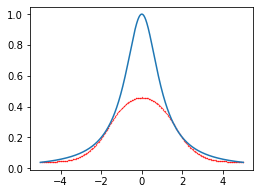

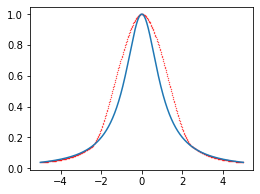

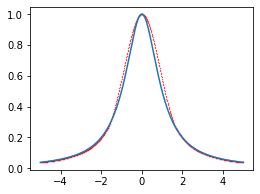

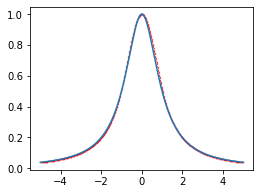

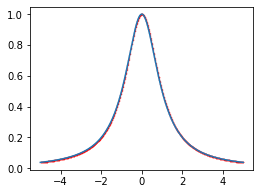

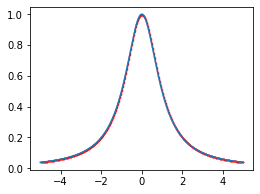

In [116]:
plot_prob2_2()

In [ ]:
#A nice match, it seems.

In [90]:
#Problem 2.3
#use Cubic Spline () method
#Reference: Page 53, 54, 55
#This is quite complicated! I'm going to draw one figure only.

#Generalize subintervals
cuts_x = np.array([-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
cuts_y = np.zeros(21)
for i in range(0,21):
    cuts_y[i] = f(cuts_x[i])
#There are 20 subintervals (21 nodes: x0,...,x20)

n= len(cuts_x)-1 #20

#Generalize h, mu, lambda(variable name = l)
h=np.zeros(n) #h0,..,h19; mu1,...mun-1; l1,...,ln-1
for i in range(0,n):
    h[i]=cuts_x[i+1]-cuts_x[i]
mu=np.zeros(n)
l=np.zeros(n)
for i in range(0,n-1):
    mu[i+1]=h[i]/(h[i]+h[i+1])
    l[i+1]=1-mu[i+1]
   # print(i+1, mu[i+1], l[i+1])

#Generalize d, d[i+1]=6*f[xi,x_i+1,x_i+2]
#f[xi,xi+1,xi+2]=(f[xi+1,xi+2]-f[xi,xi+1])/(xi+2-xi)
#f[xi,xj]=(f[xj]-f[xi])/(xj-xi)
#f[xi]=yi
d = np.zeros(n+1)
def N_f(i):
    return cuts_y[i]
def N_ff(i,j):
    return (N_f(j)-N_f(i))/(cuts_x[j]-cuts_x[i])
def N_fff(i1,i2,i3):
    return (N_ff(i2,i3)-N_ff(i1,i2))/(cuts_x[i3]-cuts_x[i1])
for i in range(0,n-1):
    d[i+1]=6*N_fff(i,i+1,i+2)

d[0] = (6/h[0])*(N_ff(0,1)-df(cuts_x[0]))   
d[20] = (6/h[19])*(df(cuts_x[20])-N_ff(n-1,n))

#Generalize Linear equations AM=D
A = np.zeros([n+1,n+1])
for i in range(1,n):
    A[i,i-1]=mu[i]
    A[i,i]=2
    A[i,i+1]=l[i]
A[0,0]=2
A[0,1]=1
A[n,n-1]=1
A[n,n]=2

#Solve the linear equations to obtain vector M
M = np.zeros(n+1)
M=np.linalg.solve(A,d)
#Finally, we have si (s0,...,s19)
def s(i, xx):
    return math.pow(cuts_x[i+1]-xx,3)*M[i]/(6*h[i])+math.pow(xx-cuts_x[i],3)*M[i+1]/(6*h[i])+(cuts_y[i]-M[i]*h[i]*h[i]/6)*(cuts_x[i+1]-xx)/h[i]+(cuts_y[i+1]-M[i+1]*h[i]*h[i]/6)*(xx-cuts_x[i])/h[i]

def plot_prob2_3():
    xx=np.zeros(5001)
    yy=np.zeros(5001)
    for i in range(0,5001): #Generating Nodes for funtion f(x)
        xx[i]=-5+(10/5000)*i
        yy[i]=f(xx[i])
    plt.figure()
    plt.plot(xx,yy)
    interpol_x = np.zeros(2001)
    interpol_y = np.zeros(2001)
    for i in range(0,20): #Plot 100 nodes in each subinterval
        for k in range(0,101):
            interpol_x[100*i+k] = cuts_x[i]+k*0.5/100
            interpol_y[100*i+k] = s(i,interpol_x[100*i+k])
    plt.scatter(interpol_x, interpol_y, s=0.1, color="red")

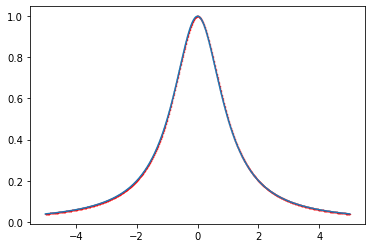

In [91]:
plot_prob2_3()

In [ ]:
#A good fit!

In [92]:
#Problem 3
#Drawing the trajectory of the object using different interpolation methods
#3.1 subsectional linear
vectorx=[0,1,4,3,0]
vectory=[0,2,4,1,0]

plt.figure(1)
interpol_x = np.zeros(401)
interpol_y = np.zeros(401)
def plot_x():
    N=100
    cuts=[0, 1, 2, 3, 4]
    for i in range(0,4): #Plot 100 nodes in each subinterval
        st=cuts[i]
        ed=cuts[i+1]
        for k in range(0,101):
            interpol_x[100*i+k] = vectorx[st]+(vectorx[ed]-vectorx[st])*k/100
            #plt.scatter(interpol_x, interpol_y, s=0.1, color="red")
            
def plot_y():
    N=100
    cuts=[0, 1, 2, 3, 4]
    for i in range(0,4): #Plot 100 nodes in each subinterval
        st=cuts[i]
        ed=cuts[i+1]
        for k in range(0,101):
            interpol_y[100*i+k] = vectory[st]+(vectory[ed]-vectory[st])*k/100
            #plt.scatter(interpol_x, interpol_y, s=0.1, color="red")        

<Figure size 432x288 with 0 Axes>

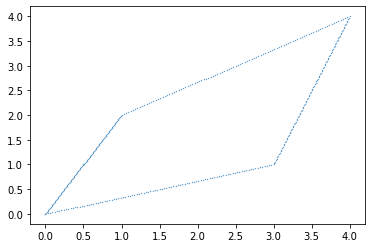

In [93]:
plot_x()
plot_y()
plt.scatter(x=interpol_x,y=interpol_y,s=0.1)

In [94]:
#3.2 Cubic Spline
#Generalize subintervals
plt.figure(2)
interpol_x = np.zeros(401)
cuts_t = np.array([0,1,2,3,4])
cuts_x = np.array([0,1,4,3,0])
cuts_y = np.array([0,2,4,1,0])

n= 4 
#Generalize h, mu, lambda(variable name = l)
h=np.zeros(n) 
for i in range(0,n):
    h[i]=cuts_t[i+1]-cuts_t[i]
mu=np.zeros(n)
l=np.zeros(n)
for i in range(0,n-1):
    mu[i+1]=h[i]/(h[i]+h[i+1])
    l[i+1]=1-mu[i+1]

d = np.zeros(n+1)
def Nx_f(i):
    return cuts_x[i]
def Nx_ff(i,j):
    return (Nx_f(j)-Nx_f(i))/(cuts_t[j]-cuts_t[i])
def Nx_fff(i1,i2,i3):
    return (Nx_ff(i2,i3)-Nx_ff(i1,i2))/(cuts_t[i3]-cuts_t[i1])
for i in range(0,n-1):
    d[i+1]=6*Nx_fff(i,i+1,i+2)

d[0] = (6/h[0])*(Nx_ff(0,1)-cuts_x[1]+cuts_x[0])   
d[4] = (6/h[3])*((cuts_x[1]-cuts_x[4])/4-Nx_ff(n-1,n))

#Generalize Linear equations AM=D
A = np.zeros([n+1,n+1])
for i in range(1,n):
    A[i,i-1]=mu[i]
    A[i,i]=2
    A[i,i+1]=l[i]
A[0,0]=2
A[0,1]=1
A[n,n-1]=1
A[n,n]=2

#Solve the linear equations to obtain vector M
M = np.zeros(n+1)
M=np.linalg.solve(A,d)
print(M)
def sx(i, tt): 
   return math.pow(cuts_t[i+1]-tt,3)*M[i]/(6*h[i])+math.pow(tt-cuts_t[i],3)*M[i+1]/(6*h[i])+(cuts_x[i]-M[i]*h[i]*h[i]/6)*(cuts_t[i+1]-tt)/h[i]+(cuts_x[i+1]-M[i+1]*h[i]*h[i]/6)*(tt-cuts_t[i])/h[i]


def plot_x_2():
    N=100
    for i in range(0,4): #Plot 100 nodes in each subinterval
        for k in range(0,101):
            interpol_x[100*i+k] = sx(i,cuts_t[i]+k/100)


[-2.59821429  5.19642857 -6.1875     -4.44642857 11.97321429]


<Figure size 432x288 with 0 Axes>

In [95]:
plot_x_2()

In [96]:
interpol_y = np.zeros(401)
n= 4 
#Generalize h, mu, lambda(variable name = l)
d = np.zeros(n+1)
def Ny_f(i):
    return cuts_y[i]
def Ny_ff(i,j):
    return (Ny_f(j)-Ny_f(i))/(cuts_t[j]-cuts_t[i])
def Ny_fff(i1,i2,i3):
    return (Ny_ff(i2,i3)-Ny_ff(i1,i2))/(cuts_t[i3]-cuts_t[i1])
for i in range(0,n-1):
    d[i+1]=6*Ny_fff(i,i+1,i+2)

d[0] = (6/h[0])*(Ny_ff(0,1)-cuts_y[1]+cuts_y[0])   
d[4] = (6/h[3])*((cuts_y[1]-cuts_y[4])/4-Ny_ff(n-1,n))

A = np.zeros([n+1,n+1])
for i in range(1,n):
    A[i,i-1]=mu[i]
    A[i,i]=2
    A[i,i+1]=l[i]
A[0,0]=2
A[0,1]=1
A[n,n-1]=1
A[n,n]=2

#Solve the linear equations to obtain vector M
M = np.zeros(n+1)
M=np.linalg.solve(A,d)
print(M)
def sy(i, tt): 
   return math.pow(cuts_t[i+1]-tt,3)*M[i]/(6*h[i])+math.pow(tt-cuts_t[i],3)*M[i+1]/(6*h[i])+(cuts_y[i]-M[i]*h[i]*h[i]/6)*(cuts_t[i+1]-tt)/h[i]+(cuts_y[i+1]-M[i+1]*h[i]*h[i]/6)*(tt-cuts_t[i])/h[i]


def plot_y_2():
    N=100
    for i in range(0,4): #Plot 100 nodes in each subinterval
        for k in range(0,101):
            interpol_y[100*i+k] = sy(i,cuts_t[i]+k/100)


[-1.33928571  2.67857143 -9.375       4.82142857  2.08928571]


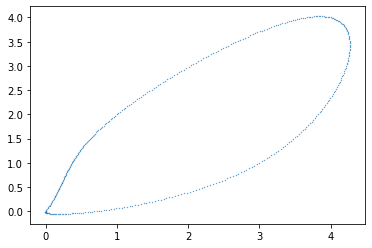

In [97]:
plot_y_2()
plt.scatter(x=interpol_x,y=interpol_y,s=0.1)